In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [4]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [5]:
model = keras.models.Sequential()
model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(10, (3, 3), activation='relu'))
model.add(layers.Conv2D(10, (3, 3), activation='relu'))
model.add(layers.Conv2D(15, (3, 3), activation='relu'))
model.add(layers.Conv2D(10, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

2022-04-30 12:17:42.952891: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 12:17:42.962591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 12:17:42.963021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 12:17:42.964826: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        280       
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 15)        1365      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 10)        1360      
                                                                 
 flatten (Flatten)           (None, 3240)              0         
                                                                 
 dense (Dense)               (None, 50)                1

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30


2022-04-29 21:49:11.529662: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-04-29 21:49:13.660596: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1719/1719 [==============================] - 14s 6ms/step - loss: 0.7402 - accuracy: 0.7268 - val_loss: 0.5137 - val_accuracy: 0.8156
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4893 - accuracy: 0.8201 - val_loss: 0.4912 - val_accuracy: 0.8150
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4198 - accuracy: 0.8471 - val_loss: 0.3903 - val_accuracy: 0.8640
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3753 - accuracy: 0.8610 - val_loss: 0.3537 - val_accuracy: 0.8740
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3471 - accuracy: 0.8716 - val_loss: 0.3371 - val_accuracy: 0.8750
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3273 - accuracy: 0.8782 - val_loss: 0.3408 - val_accuracy: 0.8810
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3096 - accuracy: 0.8845 - val_loss: 0.3277 - val_accuracy: 0.88

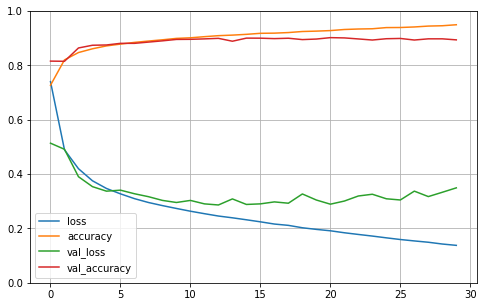

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
model2 = keras.models.Sequential()
model2.add(layers.SeparableConv2D(3, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.SeparableConv2D(10, (3, 3), activation='relu'))
model2.add(layers.SeparableConv2D(10, (3, 3), activation='relu'))
model2.add(layers.SeparableConv2D(15, (3, 3), activation='relu'))
model2.add(layers.SeparableConv2D(10, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(50, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 26, 26, 3)        15        
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 24, 24, 10)       67        
 leConv2D)                                                       
                                                                 
 separable_conv2d_2 (Separab  (None, 22, 22, 10)       200       
 leConv2D)                                                       
                                                                 
 separable_conv2d_3 (Separab  (None, 20, 20, 15)       255       
 leConv2D)                                                       
                                                                 
 separable_conv2d_4 (Separab  (None, 18, 18, 10)      

In [11]:
model2.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [12]:
history = model2.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 1.4031 - accuracy: 0.4707 - val_loss: 0.7142 - val_accuracy: 0.7368
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6353 - accuracy: 0.7591 - val_loss: 0.5475 - val_accuracy: 0.7980
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5483 - accuracy: 0.7911 - val_loss: 0.5071 - val_accuracy: 0.8168
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5062 - accuracy: 0.8081 - val_loss: 0.4705 - val_accuracy: 0.8280
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4773 - accuracy: 0.8201 - val_loss: 0.4521 - val_accuracy: 0.8398
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4561 - accuracy: 0.8288 - val_loss: 0.4203 - val_accuracy: 0.8474
Epoch 7/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4361 - accuracy: 0.8367 - val_loss: 0.4268 - val_ac

In [15]:
test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3735 - accuracy: 0.8822 - 1s/epoch - 3ms/step
313/313 - 1s - loss: 0.3684 - accuracy: 0.8893 - 858ms/epoch - 3ms/step


In [26]:
import time

t = time.time()
model.predict(X_test, verbose=1)
print(f"Model 1 predict time = {time.time() - t:.5f}")

t = time.time()
model2.predict(X_test, verbose=1)
print(f"Model 2 predict time = {time.time() - t:.5f}")

313/313 [==============================] - 1s 2ms/step
Model 2 predict time = 0.66440
313/313 [==============================] - 1s 2ms/step
Model 1 predict time = 0.63443


In [21]:
X_test.shape

(10000, 28, 28)

In [23]:
X_test[0].shape

(28, 28)

In [27]:
# model.save("normal_conv.h5")
# model2.save("sep_conv.h5")

In [7]:
import os

size1 = os.path.getsize("normal_conv.h5")
size2 = os.path.getsize("sep_conv.h5")
print(f"Size of normal_conv = {size1/1024**2:.3f} MB")
print(f"Size of sep_conv = {size2/1024**2:.3f} MB")

Size of normal_conv = 0.669 MB
Size of sep_conv = 0.659 MB


In [8]:
def get_model_size(model):
    import os
    model.save("test.h5")
    size = os.path.getsize("test.h5")
    print(f"Size of Model = {size/1024**2:.4f}MB")
    os.remove("test.h5")
    return size

In [9]:
size1 = get_model_size(model)
# size2 = get_model_size(model2)

Size of Model = 0.6666MB


NameError: name 'model2' is not defined

In [10]:
def get_inference_time(model, test=tf.random.uniform((1, 28, 28, 1))):
    import time
    start = time.time()
    model.predict(test)
    inf = time.time() - start
    print(f"Inference time = {inf:.4f}s")
    return inf

In [11]:
inf1 = get_inference_time(model)
# inf2 = get_inference_time(model2)

2022-04-30 12:19:44.510816: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


Inference time = 2.2997s


2022-04-30 12:19:46.045952: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


NameError: name 'model2' is not defined

In [12]:
import tensorflow_model_optimization as tfmot
import numpy as np

In [15]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruing after 2 epochs
batch_size = 128
epochs = 5
validation_split = 0.1

n_imgs = X_train_full.shape[0] * (1 - validation_split)
end_step = np.ceil(n_imgs / batch_size).astype(np.int32) * epochs

# Define model for pruning
pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.1, 
                                                            final_sparsity = 0.4,
                                                            begin_step=0,
                                                            end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

model_for_pruning.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])

model_for_pruning.summary()

get_model_size(model)
get_model_size(model_for_pruning)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 26, 26, 3)        59        
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_conv2d_  (None, 24, 24, 10)       552       
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_conv2d_  (None, 22, 22, 10)       1812      
 2 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_conv2d_  (None, 20, 20, 15)       2717      
 3 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_conv2d_  (None, 18, 18, 10)       2

1384904

In [16]:
import tempfile

logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(X_train, y_train,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

Epoch 1/5


/home/mint-lab/anaconda3/envs/dl_ws/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


387/387 [==============================] - 7s 10ms/step - loss: 0.6343 - accuracy: 0.1064 - val_loss: 0.4526 - val_accuracy: 0.1156
Epoch 2/5
387/387 [==============================] - 3s 8ms/step - loss: 0.4263 - accuracy: 0.1061 - val_loss: 0.3806 - val_accuracy: 0.0996
Epoch 3/5
387/387 [==============================] - 3s 9ms/step - loss: 0.3635 - accuracy: 0.1039 - val_loss: 0.3497 - val_accuracy: 0.1049
Epoch 4/5
387/387 [==============================] - 3s 8ms/step - loss: 0.3284 - accuracy: 0.1037 - val_loss: 0.3499 - val_accuracy: 0.0991
Epoch 5/5
387/387 [==============================] - 3s 8ms/step - loss: 0.3023 - accuracy: 0.1036 - val_loss: 0.3172 - val_accuracy: 0.0991


In [17]:
get_model_size(model)
get_model_size(model_for_pruning)

Size of Model = 0.6666MB
Size of Model = 2.6238MB


2751224

In [64]:
%load_ext tensorboard

%tensorboard --logdir={logdir}


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
